In [ ]:
import matplotlib.pyplot as plt
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pandas_datareader import data as web

import ipynb
import ipynb.fs.full.controlNoRebalance as noRebalance
import ipynb.fs.full.controlRebalanceMonthly as monthlyRebalance
import ipynb.fs.full.arimaModel as arimaModel

In [2]:
noRebalanceData = noRebalance.portfolioValue
noRebalancePortfolioValue = list(map(lambda x: x*100000, noRebalanceData))

monthlyRebalanceData = monthlyRebalance.portfolioValue
monthlyRebalancePortfolioValue = list(map(lambda x: x*100000, monthlyRebalanceData))

## Graph of the portfolio value against time
### The arima model far outperforms the 2 control portfolios.

- ARIMA model: 145.33%
- Monthly rebalanced control model: 41.63%
- Never rebalanced control model: 51.98%

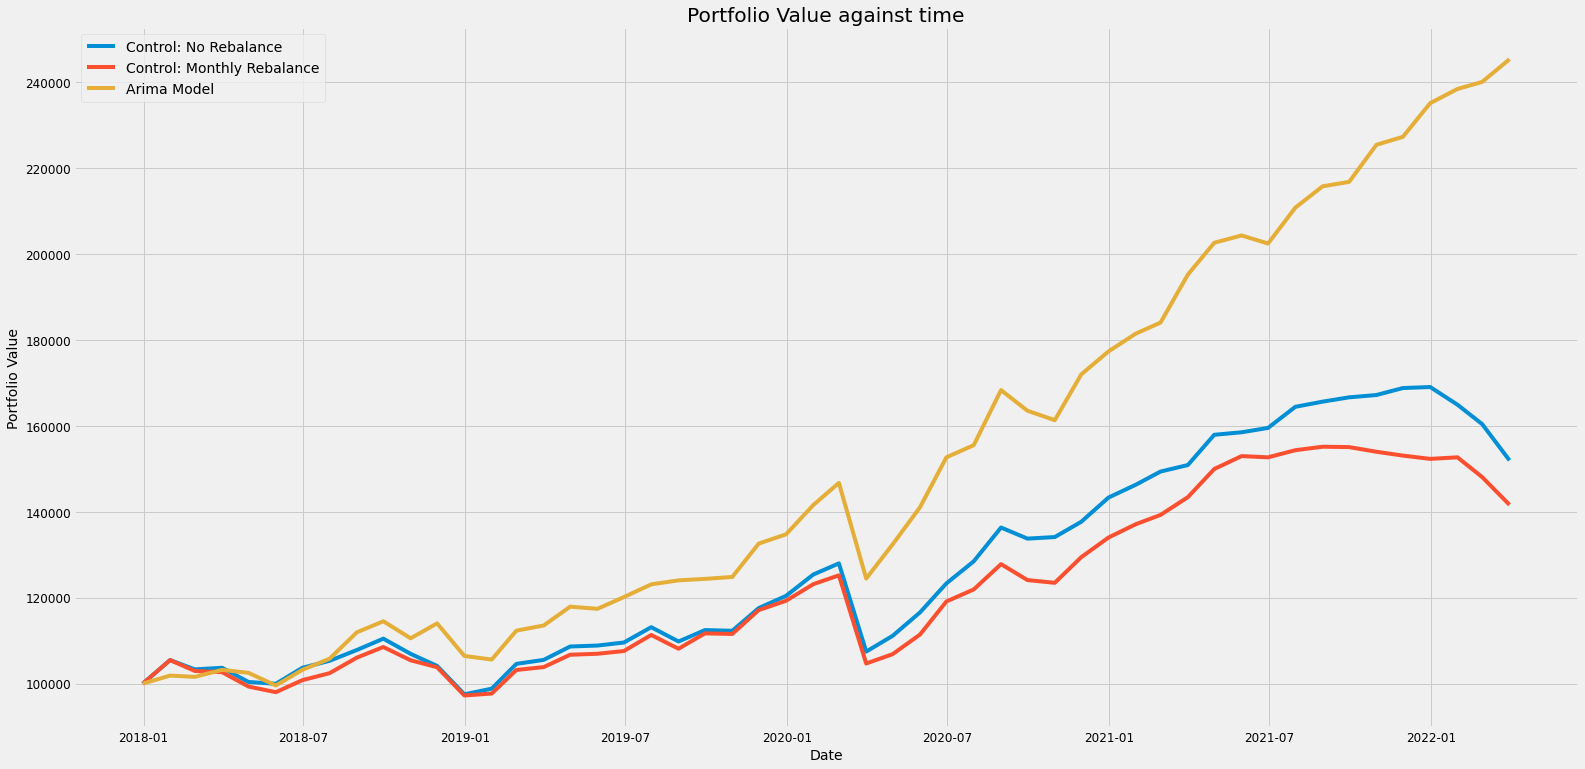

In [5]:
x = noRebalance.data.index

f, axes = plt.subplots(figsize=(24, 12))
plt.title('Portfolio Value against time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.plot(x,noRebalancePortfolioValue)
plt.plot(x, monthlyRebalancePortfolioValue)
plt.plot(x, arimaModel.allPortfolioValues)
plt.legend(['Control: No Rebalance', 'Control: Monthly Rebalance', 'Arima Model'])


## Sharpe Ratio
#### Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. A higher sharpe ratio is desirable because it shows that the portfolio gives superior returns per unit of risk. i.e. it gives better returns at the same risk level

Our ARIMA model gives a sharpe ratio that is much higher than that of the control portfolios, showing that it provides superior risk adjusted returns
- ARIMA model: 3.34
- Monthly rebalanced control model: 1.37
- Never rebalanced control model: 1.63


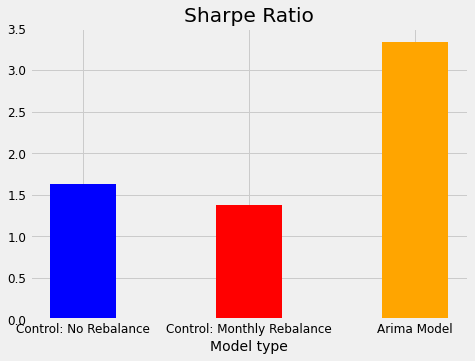

In [4]:
data = {'Control: No Rebalance': noRebalance.sharpeRatio, 'Control: Monthly Rebalance': monthlyRebalance.sharpeRatio, 'Arima Model': arimaModel.sharpeRatio }
# data = {'Control: No Rebalance': 1.63, 'Control: Monthly Rebalance': 1.37, 'Arima Model': 3.34 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
plt.bar(courses, values, color =['blue', 'red', 'orange'],
        width = 0.4)
 
plt.xlabel("Model type")
plt.title("Sharpe Ratio")
plt.show()

## Overall, over the testing time frame, our ARIMA model gives the best absolute and risk adjusted returns out of the 3 portfolios